In [1]:
import pandas as pd
from prophet import Prophet
import plotly
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed
11:05:37 - cmdstanpy - INFO - Chain [1] start processing
11:05:38 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jyin1\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\jyin1\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\jyin1\AppData\Local\Temp\ipykern

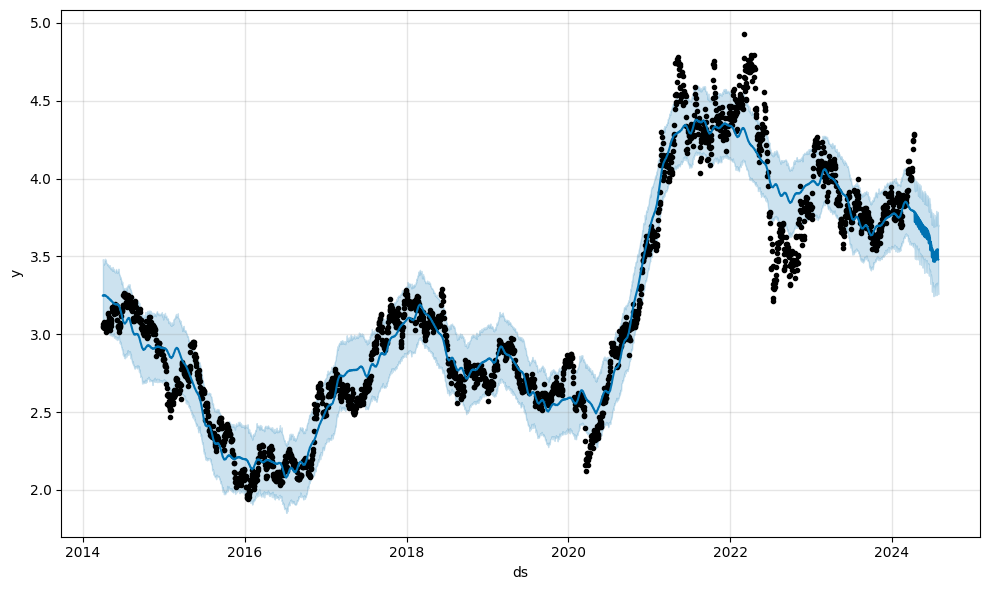

In [9]:
raw_df = yf.download('HG=F', '2014-04-01', '2024-04-10')
raw_df = raw_df[['Close']]
df = raw_df.copy()

# reconfigure df to prophet format
df.reset_index(inplace=True)
df.rename(columns={'Date': 'ds'}, inplace=True)
df.rename(columns={'Close': 'y'}, inplace=True)

prophet = Prophet()
prophet.fit(df)
future = prophet.make_future_dataframe(periods=110)

forecast = prophet.predict(future)
fig1 = prophet.plot(forecast)
# export to excel
columns = ['ds', 'trend', 'yhat_lower', 'yhat_upper', 'yhat']
export_df = forecast[columns]
export_df['ds'] = pd.to_datetime(export_df['ds'])
export_df.set_index('ds', inplace=True)
export_df = export_df.resample('W-FRI').last() # only weekly data 
export_df.to_excel("experiment.xlsx", index=True)